In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicidal-tweet-detection-dataset/Suicide_Ideation_Dataset(Twitter-based).csv


#   Suicidal Tweet Detection 
###   Detecting Suicidal Sentiments in Tweets

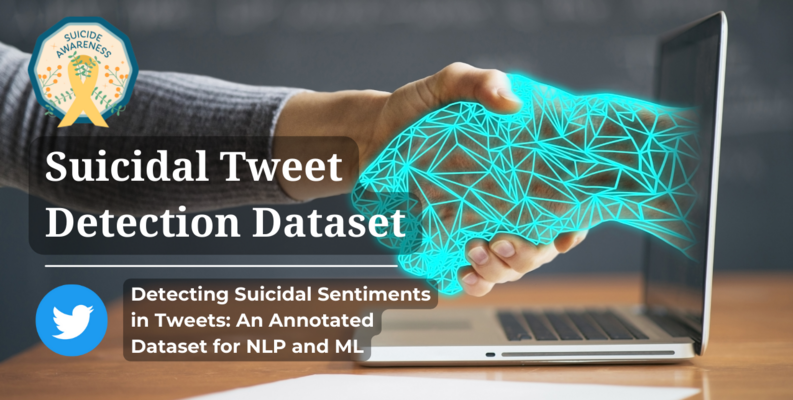

> This dataset provides a collection of tweets along with an annotation indicating whether each tweet is related to suicide or not. The primary objective of this dataset is to facilitate the development and evaluation of machine learning models for the classification of tweets as either expressing suicidal sentiments or not.

##  Columns:

> Tweet: This column contains the text content of the tweets obtained from various sources. The tweets cover a wide range of topics, emotions, and expressions.
Suicide: This column provides annotations indicating the classification of the tweets. The possible values are:
Not Suicide post: This label is assigned to tweets that do not express any suicidal sentiments or intentions.
Potential Suicide post: This label is assigned to tweets that exhibit indications of suicidal thoughts, feelings, or intentions.


## Usage:
> This dataset can be used for various natural language processing (NLP) and sentiment analysis tasks. It is particularly suitable for training and evaluating machine learning models that can automatically classify tweets as either non-suicidal or potentially suicidal. Researchers, data scientists, and developers can use this dataset to develop systems that can identify and flag concerning content on social media platforms, potentially contributing to early intervention and support for individuals in distress.

## Potential Applications:

- Suicidal Ideation Detection: The dataset can be used to train models to automatically detect and flag tweets containing potential suicidal content, enabling platforms to take appropriate actions.
- Mental Health Support: Insights from this dataset can be used to develop tools that offer mental health resources or interventions to users who express signs of distress.
- Sentiment Analysis Research: Researchers can analyze the linguistic patterns and sentiment of both non-suicidal and potentially suicidal tweets to gain insights into the language used by individuals in different emotional states.
- Public Health Awareness: The dataset can be used to raise awareness about mental health issues and the importance of responsible social media usage.

# Import Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/suicidal-tweet-detection-dataset/Suicide_Ideation_Dataset(Twitter-based).csv')

In [4]:
df.head(5)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [6]:
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

<Axes: xlabel='Suicide', ylabel='count'>

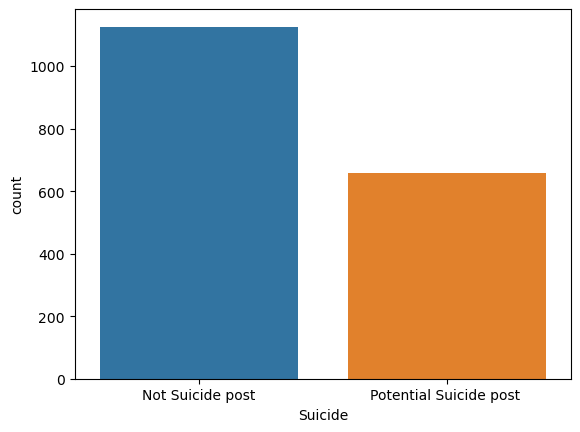

In [9]:
sns.countplot(x=df['Suicide'],data=df)

In [10]:
import nltk
import re
import string,time
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Data preprocessing 

# Lower case 

In [12]:
df['Tweet'] = df['Tweet'].str.lower()
    

In [13]:
df.head(2)

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@alexia you want his money.,Not Suicide post


# Tokenization, Stopword ,Stemming

In [14]:
def preprocessor(text):
   
    text = word_tokenize(text)
    text = [PorterStemmer().stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [15]:
df['Tweet'] = df['Tweet'].apply(preprocessor)

In [16]:
df.head()

,Tweet,Suicide
0,make lunch,Not Suicide post
1,@ alexia want money .,Not Suicide post
2,@ dizzyhrvi crap took forev put togeth . iâm...,Potential Suicide post
3,@ jnaylor # kiwitweet hey jer ! sinc start twi...,Not Suicide post
4,tri & quot ; delici librari 2 & quot ; mix res...,Not Suicide post


In [17]:
X = df.iloc[:,0:1]
y = df['Suicide']

# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
y = encoder.fit_transform(y)

In [20]:
y

array([0, 0, 1, ..., 0, 0, 0])

# Train-Test Split 

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [22]:
print(X_train.shape)

(1428, 1)


In [23]:
print(X_test.shape)

(357, 1)


In [24]:
print(y_train.shape)

(1428,)


# Bag-of-Words(BoW)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X_train_bow = cv.fit_transform(X_train['Tweet']).toarray()
X_test_bow = cv.transform(X_test['Tweet']).toarray()

In [27]:
X_train_bow.shape

(1428, 4724)

# Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [29]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()
    
    algos = [g,b,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]
    
    result = pd.DataFrame(index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))
        
        
        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))
        
    
    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall    
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC
        
    return result.sort_values('Test_Accuracy Score', ascending=False)

In [30]:
classalgo_test(X_train_bow,X_test_bow,y_train,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
BaggingClassifier,0.977591,0.989879,0.968317,0.977591,0.952381,0.943662,0.940351,0.952381,0.949840
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.935574,0.934783,0.918149,0.935574,0.930021
GradientBoostingClassifier,0.960084,0.983158,0.942482,0.960084,0.932773,0.947368,0.913043,0.932773,0.924204
AdaBoostClassifier,0.955182,0.941406,0.937743,0.955182,0.924370,0.902778,0.905923,0.924370,0.921835
XGBClassifier,0.992297,0.996071,0.989268,0.992297,0.913165,0.944444,0.884758,0.913165,0.899729
BernoulliNB,0.924370,0.992754,0.883871,0.924370,0.837535,0.988506,0.747826,0.837535,0.798363
GaussianNB,0.955182,0.889655,0.941606,0.955182,0.663866,0.548936,0.682540,0.663866,0.703385


In [31]:
bg=BaggingClassifier()
bg.fit(X_train_bow,y_train)

BaggingClassifier()

In [32]:
bg_predict=bg.predict(X_test_bow)

In [33]:
print(confusion_matrix(y_test,bg_predict))

[[204  10]
 [ 16 127]]
